# HW1

In [2]:
using Test, Random

In [16]:
# Associativity of addition.
count = 0
N = 10000
for i in 1:10000
    a, b, c = rand(Float64, 3)
    if (a + b) + c == a + (b + c)
        count += 1
    end
end

count

8303

In [18]:
# Existence of additive identity
count = 0
N = 10000

for i in 1:10000
    a = rand(Float64)
    if a + 0 == a
        count += 1
    end
end

count

10000

In [19]:
# Existence of additive inverses.
count = 0
N = 10000

for i in 1:10000
    a = rand(Float64)
    if a + - a == 0
        count += 1
    end
end

count

10000

In [22]:
# Commutativity of multiplication
count = 0
N = 10000

for i in 1:10000
    a, b = rand(Float64, 2)
    if a * b == b * a
        count += 1
    end
end

count

10000

In [23]:
# Associativity of multiplication

count = 0
N = 10000
for i in 1:10000
    a, b, c = rand(Float64, 3)
    if (a * b) * c == a * (b * c)
        count += 1
    end
end

count

6576

In [24]:
# Existence of multiplicative identity

count = 0
N = 10000

for i in 1:10000
    a = rand(Float64)
    if a * 1 == a
        count += 1
    end
end

count

10000

In [25]:
# Existence of multiplicative inverses.
count = 0
N = 10000

for i in 1:10000
    a = rand(Float64)
    if a * (1 / a) == 1
        count += 1
    end
end

count

8509

In [35]:
NaN == NaN

false

In [26]:
# Distributive law

count = 0
N = 10000
for i in 1:10000
    a, b, c = rand(Float64, 3)
    if a * (b + c) == a * b + b * c
        count += 1
    end
end

count

0

# HW2

In [36]:
begin
    type_arr = [ComplexF64;Complex{AbstractFloat};Complex{<:AbstractFloat};
                AbstractFloat;Union{Float64, ComplexF64};
                Int32;Matrix{Float32};Base.RefValue];

    for aType in type_arr
        print("|",aType)
        print("|",isconcretetype(aType))
        print("|",isprimitivetype(aType))
        print("|",isabstracttype(aType))
        print("|",isbitstype(aType))
        print("|",ismutable(aType))
        println("|")
    end
end

|ComplexF64|true|false|false|true|true|
|Complex{AbstractFloat}|true|false|false|false|true|
|Complex{<:AbstractFloat}|false|false|false|false|false|
|AbstractFloat|false|false|true|false|true|
|Union{Float64, ComplexF64}|false|false|false|false|false|
|Int32|true|true|false|true|true|
|Matrix{Float32}|true|false|false|false|true|
|Base.RefValue|false|false|false|false|false|


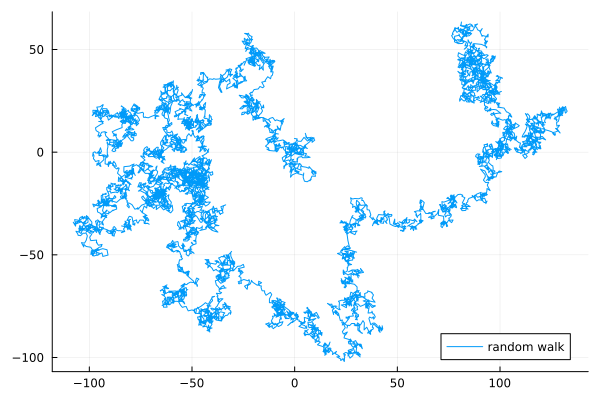

In [28]:
using Distributions, LinearAlgebra, Random


function random_walk(STEP::Int)
    #initialize the problem
    d = MvNormal(zeros(2), Diagonal(ones(2)))
    dx = rand(d, STEP)
    x = Array{Float64, 2}(undef, 2, STEP + 1)
    x[1, 1] = 0
    x[2, 1] = 0

    #random walk
    for step = 1 : STEP
        for j in 1:2
            x[j, step + 1] = x[j, step] + dx[j, step]
        end
    end
    return x
end

STEP = 10000
x = random_walk(STEP)

using Plots

x_max = maximum(x[1,:])
x_min = minimum(x[1,:])

y_max = maximum(x[2,:])
y_min = minimum(x[2,:])

max_xy = max(x_max, y_max)
min_xy = min(x_min, y_min)


plot(x[1,:], x[2, :]; aspect_ratio=:equal,  label = "random walk")

# HW3

In [1]:
using LinearAlgebra

function gauss_jordan(A_in)
    A = copy(A_in)
    n = size(A,1)
    B = Matrix{eltype(A_in)}(I, n, n)
    for i = 1:n #i is for the column
        # C = Matrix{Float64}(I, n, n)
        for j = 1:n
            if j != i
                c_ji = A[j, i] / A[i, i]
                for k = 1 : i
                    B[j, k] -= B[i, k] * c_ji
                end 
                for k = i : n
                    A[j, k] -= A[i, k] * c_ji
                end
            end
        end
    end

    for i = 1:n
        for j in 1:n
            B[i, j] = B[i, j] / A[i, i]            
        end
    end
    return B
end

gauss_jordan (generic function with 1 method)

In [2]:
using Test
@testset "Gauss Jordan" begin
    for i in 1:100
        n = rand(1:100)
        A = randn(n, n)
        @test gauss_jordan(A) * A ≈ Matrix{Float64}(I, n, n)
    end
end

Test Summary: | Pass  Total  Time
Gauss Jordan  |  100    100  0.8s


Test.DefaultTestSet("Gauss Jordan", Any[], 100, false, false, true, 1.680065518058895e9, 1.680065518821272e9)

# HW4

In [32]:
using LinearAlgebra

function Givens_rotation(A)
    n = size(A, 1)
    Q = Matrix{eltype(A)}(I, n, n)
    R = copy(A)
    @inbounds for i = 1:n - 1
        t_ii = R[i, i]
        t_ji = R[i + 1, i]

        r = sqrt(t_ii^2 + t_ji^2)
        c = t_ii / r
        s = t_ji / r


        for j in i: min(i+2, n)
            A_1 = R[i, j]
            A_2 = R[i + 1, j]
            R[i, j] = c * A_1 + s * A_2
            R[i + 1, j] = - s * A_1 + c * A_2
        end
        
        for j in 1:min(i+2, n)
            Q_1 = Q[j, i]
            Q_2 = Q[j, i + 1]
            Q[j, i] = c * Q_1 + s * Q_2
            Q[j, i + 1] = - s * Q_1 + c * Q_2
        end
    end

    return Q, R
end

using Random


function rand_A(n)
    A = Matrix(Tridiagonal(rand(n, n)))
    return A
end

using Test

@testset "Givens Rotation" begin
	for i in 1:100
		n = rand(1:100)
		A = rand_A(n)
		Q, R = Givens_rotation(A)
		@test Q * R ≈ A
	end
end

Test Summary:   | Pass  Total  Time
Givens Rotation |  100    100  0.0s


Test.DefaultTestSet("Givens Rotation", Any[], 100, false, false, true, 1.679405541597357e9, 1.679405541618447e9)

In [33]:
function my_spv(sp, v)
    @assert sp.n == size(v, 1)
    n = sp.n
    m = sp.m
    spv = zeros(Float64, m)
    sp_val = sp.nzval
    sp_row = sp.rowval
    for i in 1:n
        for j in nzrange(sp, i)
            k = sp_row[j]
            spv[k] += sp_val[j] * v[i]
        end
    end
    return spv
end


using SparseArrays, Test

@testset "sparse matrix - vector multiplication" begin
	for k = 1:100
		m, n = rand(1:100, 2)
		density = rand()
		sp = sprand(m, n, density)
		v = randn(n)
        @test Matrix(sp) * v ≈ my_spv(sp, v)
	end
end

Test Summary:                         | Pass  Total  Time
sparse matrix - vector multiplication |  100    100  0.2s


Test.DefaultTestSet("sparse matrix - vector multiplication", Any[], 100, false, false, true, 1.67940571615519e9, 1.679405716352672e9)